In [107]:
%matplotlib inline
import pandas as pd
from pandas import set_option
#Limit dataframe exibition to 8 rows
set_option("display.max_rows", 8)
import matplotlib.pyplot as plt
from pylab import plot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [108]:
veiculos = pd.read_csv('veiculos/veiculos.csv', sep=',')

In [109]:
veiculos.shape

(5000, 11)

In [110]:
veiculos

,Caso,Modelo,Opcionais,Design,Concessionaria,Geral,Renda,Pessoas,Quilometragem,Remodelacao,Idade
0,1,Deltaforce3,Inexistentes,Adiante dos outros,Bastante satisfatória,Muito insatisfeito,22.99,4,447,1,44
1,2,Chiconaultla,Inexistentes,Adiante dos outros,Muito insatisfatória,Muito insatisfeito,7.28,1,334,2,18
2,3,Valentiniana,Ar_e_direção,Atualizados,Bastante satisfatória,Muito insatisfeito,31.31,5,465,3,35
3,4,Deltaforce3,Inexistentes,Atualizados,Satisfatória,Muito insatisfeito,13.52,3,349,4,34
...,...,...,...,...,...,...,...,...,...,...,...
4996,4997,SpaceShuttle,Ar_e_direção,Atualizados,Bastante satisfatória,Insatisfeito,23.55,4,559,3,38
4997,4998,Deltaforce3,Ar_e_direção,Atualizados,Satisfatória,Satisfeito,28.5,5,424,2,38
4998,4999,Chiconaultla,Inexistentes,Adiante dos outros,Muito insatisfatória,Muito insatisfeito,4.61,1,472,0,31
4999,5000,Chiconaultla,Inexistentes,Adiante dos outros,Muito insatisfatória,Muito insatisfeito,8.47,1,493,3,30


In [111]:
veiculos.columns

Index([u'Caso', u'Modelo', u'Opcionais', u'Design', u'Concessionaria',
       u'Geral', u'Renda', u'Pessoas', u'Quilometragem', u'Remodelacao',
       u'Idade'],
      dtype='object')

In [112]:
print(str(len(veiculos.ix[veiculos['Idade']==' '])) + ' clientes não declararam a idade')

18 clientes não declararam a idade


In [113]:
print(str(len(veiculos.ix[veiculos['Quilometragem']==' '])) + ' clientes não declararam a Km media do veiculo')

5 clientes não declararam a Km media do veiculo


In [114]:
print(str(veiculos.ix[veiculos['Quilometragem'] !=' ', 'Quilometragem'].astype(int).mean()) + \
      ' é a média de km rodados por mês')

499.751951952 é a média de km rodados por mês


In [115]:
veiculos.columns

Index([u'Caso', u'Modelo', u'Opcionais', u'Design', u'Concessionaria',
       u'Geral', u'Renda', u'Pessoas', u'Quilometragem', u'Remodelacao',
       u'Idade'],
      dtype='object')

In [116]:
veiculos['Modelo'].value_counts()

Chiconaultla    1640
Deltaforce3     1254
Valentiniana     879
SpaceShuttle     686
LuxuriousCar     532
                   9
Name: Modelo, dtype: int64

In [117]:
print(str(veiculos.ix[(veiculos['Modelo'] =='LuxuriousCar') & \
                      (veiculos['Idade'] !=' '), 'Idade'].astype(int).mean()) + \
      ' é a média dos proprietários do carro LuxuriousCar')
print(str(veiculos.ix[(veiculos['Modelo'] =='Chiconaultla') & \
                      (veiculos['Idade'] !=' '), 'Idade'].astype(int).mean()) + \
      ' é a média dos proprietários do carro Chiconaultla')

41.6559546314 é a média dos proprietários do carro LuxuriousCar
30.9540441176 é a média dos proprietários do carro Chiconaultla


In [118]:
veiculos.ix[veiculos['Modelo'] =='Chiconaultla', 'Opcionais'].value_counts()

Inexistentes        1338
Ar_e_direção         247
AD_Trio_Elétrico      46
ADT_Freios_ABS         5
                       4
Name: Opcionais, dtype: int64

In [119]:
veiculos.ix[veiculos['Modelo'] =='LuxuriousCar', 'Opcionais'].value_counts()

ADT_Freios_ABS      222
AD_Trio_Elétrico    159
Ar_e_direção        137
Inexistentes         13
                      1
Name: Opcionais, dtype: int64

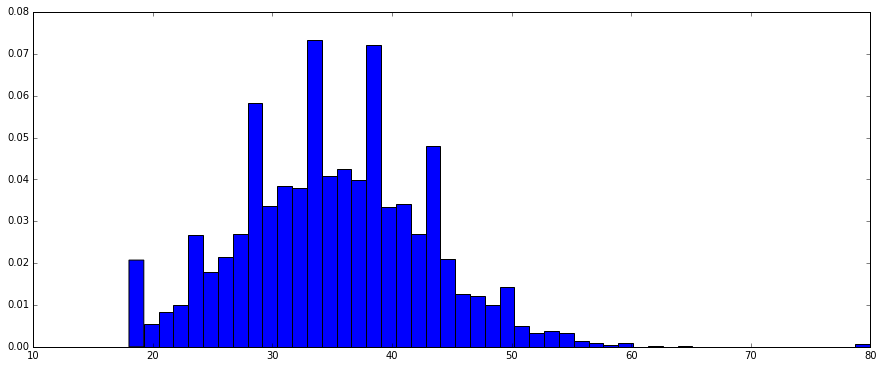

In [42]:
n, bins, patches = plt.hist(veiculos.ix[veiculos['Idade'] !=' ', 'Idade'].astype(int)\
                            , 50, normed=1, alpha=1)

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [122]:
veiculos = veiculos.drop('Caso', 1)

#### Drop lines that have columns with ' ' 

In [123]:
for colunas in veiculos.columns:
    veiculos = veiculos.ix[veiculos[colunas] != ' ']

In [124]:
colunas = []
for col in veiculos.columns: 
    if len(veiculos[col].unique()) <= 6:
        colunas.append(col)

In [125]:
colunas

['Modelo',
 'Opcionais',
 'Design',
 'Concessionaria',
 'Geral',
 'Pessoas',
 'Remodelacao']

#### Convert number columns to float/int

In [126]:
veiculos['Renda'] = veiculos['Renda'].astype(float)
veiculos['Quilometragem'] = veiculos['Quilometragem'].astype(int)
veiculos['Idade'] = veiculos['Idade'].astype(int)

### One hot on categorical variables

In [127]:
# for each item in object transform into factor and then into 'one-hot'
# for example: [C,D,E,E] --factor--> [0,1,2,2] --One-hot--> [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
novasCol = []
for i in range(len(colunas)):
    o = colunas[i]

    coluna = pd.Series(pd.factorize(veiculos.ix[:, o]))[0]
    
    enc = OneHotEncoder(handle_unknown='ignore')
    
    x = enc.fit_transform(coluna.reshape(-1,1))
    
    
    df = pd.DataFrame(x.toarray())
    
    df.columns = [o + "-" + str(x) for x in enc.active_features_]
    
    
    novasCol.append(df)
    
    
    del veiculos[o]

In [128]:
df = pd.DataFrame(pd.concat(novasCol, axis=1))

del novasCol

In [129]:
veiculos = pd.concat([veiculos, df ], axis=1)

In [143]:
veiculos

,Renda,Quilometragem,Idade,Modelo-0,Modelo-1,Modelo-2,Modelo-3,Modelo-4,Opcionais-0,Opcionais-1,...,Pessoas-2,Pessoas-3,Pessoas-4,Pessoas-5,Remodelacao-0,Remodelacao-1,Remodelacao-2,Remodelacao-3,Remodelacao-4,Remodelacao-5
0,22.99,447.0,44.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.28,334.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,31.31,465.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.52,349.0,34.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,23.55,559.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,28.50,424.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4.61,472.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4999,8.47,493.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# y_pred = KMeans(n_clusters=8, n_jobs=-1).fit_predict(veiculos.fillna(0))